In [3]:
ds_path = '/kaggle/input/digit-recognizer/train.csv'

import pandas as pd
ds = pd.read_csv(ds_path)

# Digit Recognizer for MNIST dataset

In [4]:
ds.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ds.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
y_ds = ds.pop('label')
y_ds = y_ds.values.reshape(-1)
x_ds = ds

# Splitting test-val set
from sklearn.model_selection import train_test_split
x_ds_train, x_ds_val, y_ds_train, y_ds_val = train_test_split(x_ds, y_ds, test_size=0.25, random_state=1)

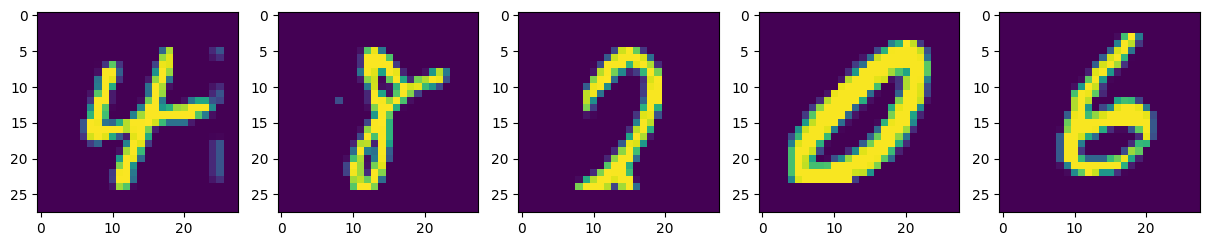

In [7]:
# Visualize some samples
import matplotlib.pyplot as plt
from random import randrange

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(0,5):
    j = randrange(len(x_ds_train))
    sample_image = x_ds_train.iloc[j,:].values.reshape(28,28)
    axes[i].imshow(sample_image)
plt.show()

## Building the Models
### Fisrt model

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model1 = keras.Sequential([
    layers.Dense(784, activation = 'sigmoid', input_shape=[784]),
    layers.Dense(10, activation = 'softmax'),
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience  = 15,
    verbose   = 1,
    restore_best_weights = True,
)

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7526 - loss: 0.8295 - val_accuracy: 0.9169 - val_loss: 0.2959
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9212 - loss: 0.2841 - val_accuracy: 0.9354 - val_loss: 0.2455
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9384 - loss: 0.2297 - val_accuracy: 0.9401 - val_loss: 0.2163
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9469 - loss: 0.1962 - val_accuracy: 0.9450 - val_loss: 0.1970
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9478 - loss: 0.1919 - val_accuracy: 0.9422 - val_loss: 0.1969
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9488 - loss: 0.1846 - val_accuracy: 0.9503 - val_loss: 0.1815
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9541 - loss: 0.1687 - val_accuracy: 0.9470 - val_loss: 0.1780
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9566 - loss: 0.1535 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

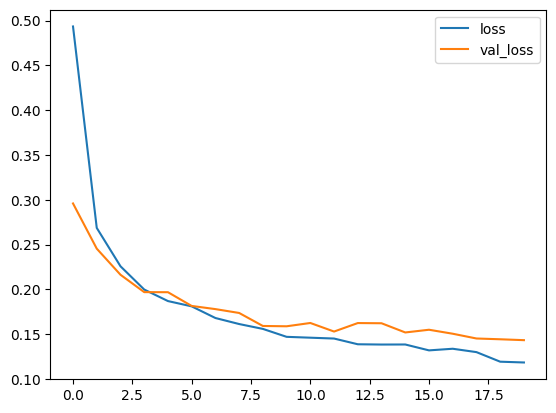

In [10]:
history = model1.fit(
    x_ds_train, y_ds_train,
    validation_data = (x_ds_val, y_ds_val),
    batch_size = 256,
    epochs = 20,
    callbacks = [early_stopping],
)

import  matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history.history.keys()

In [11]:
model1.evaluate(x_ds_val, y_ds_val)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9518 - loss: 0.1520


[0.14335305988788605, 0.9558095335960388]

From this graph we can see that the model fits alright, without underfitting or overfitting. Let's tweak the model more and see if this could be improved to give even further accurate results.

### A second model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,498 (3.18 MB)

 Trainable params: 833,498 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5171 - loss: 1.6164 - val_accuracy: 0.8991 - val_loss: 0.4357
Epoch 2/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8825 - loss: 0.4845 - val_accuracy: 0.9165 - val_loss: 0.3002
Epoch 3/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8962 - loss: 0.3792 - val_accuracy: 0.9286 - val_loss: 0.2480
Epoch 4/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9036 - loss: 0.3457 - val_accuracy: 0.9335 - val_loss: 0.2236
Epoch 5/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9084 - loss: 0.3219 - val_accuracy: 0.9341 - val_loss: 0.2159
Epoch 6/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9111 - loss: 0.3039 - val_accuracy: 0.9395 - val_loss: 0.1991
Epoch 7/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9146 - loss: 0.2887 - val_accuracy: 0.9425 - val_loss: 0.1876
Epoch 8/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9192 - loss: 0.2735 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

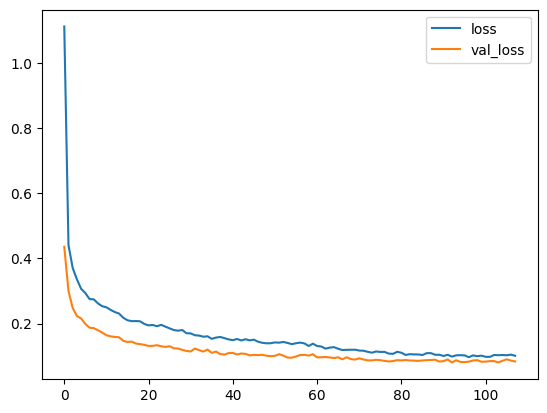

In [13]:
model2 = keras.Sequential([
    layers.Dense(784, activation = 'sigmoid', input_shape=[784]),
    layers.Dropout(rate = 0.3),
    
    layers.Dense(256, activation = 'sigmoid'),
    layers.Dropout(rate = 0.2),
    
    layers.Dense(64, activation = 'sigmoid'),
    layers.Dropout(rate=0.2),
    
    layers.Dense(10, activation = 'softmax'),
])


model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience  = 15,
    verbose   = 1,
    restore_best_weights = True,
)

model2.summary()

history = model2.fit(
    x_ds_train, y_ds_train,
    validation_data = (x_ds_val, y_ds_val),
    batch_size = 256,
    epochs = 200,
    callbacks = [early_stopping],
)

import  matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history.history.keys()

In [14]:
model2.evaluate(x_ds_val, y_ds_val)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0892


[0.08100331574678421, 0.9756190180778503]

In [16]:
labels = [0,1,2,3,4,5,6,7,8,9]

In [17]:
evalset = model2.predict(x_ds_val)
evalset_df = pd.DataFrame(evalset, columns=labels)

eval_result = evalset_df.idxmax(axis=1)
eval_result.head()

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0    1
1    5
2    2
3    8
4    4
dtype: int64

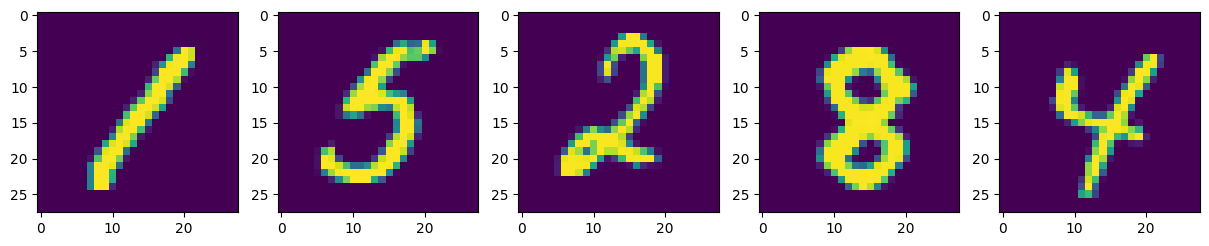

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(0,5):
    sample_image = x_ds_val.iloc[i,:].values.reshape(28,28)
    axes[i].imshow(sample_image)
plt.show()

## Predicting and Submission

In [19]:
test_path = '/kaggle/input/digit-recognizer/test.csv'
test_ds = pd.read_csv(test_path)

submission_pr = model2.predict(test_ds)
submission_df = pd.DataFrame(submission_pr, columns=labels)
submission_df = submission_df.idxmax(axis=1)

submission_df

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Length: 28000, dtype: int64

In [20]:
submission_final = pd.DataFrame({
    'ImageId': submission_df.index+1,
    'Label'  : submission_df.values
})

submission_final

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [21]:
submission_final.to_csv('submission.csv', index=False)
print('Submitted')

Submitted
